In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib as mpt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("dataExcel.csv")

df = pd.DataFrame(data)

In [28]:
df['Result'] = df['Result'].replace({'Yes': 1, 'No': 0})


In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(df.drop(columns=['Result']))

normalized_df = pd.DataFrame(scaled_features, columns=df.drop(columns=['Result']).columns)

normalized_df['Result'] = df['Result']

normalized_df = pd.DataFrame(normalized_df)

normalized_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [32]:
pca = PCA(n_components=normalized_df.shape[1] - 1)
principal_components = pca.fit_transform(normalized_df.drop(columns=['Result']))
pca_df = pd.DataFrame(data=principal_components, columns=normalized_df.drop(columns=['Result']).columns)
print("PCA Sonuçları:")
pca_df.head()

PCA Sonuçları:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.304955,0.090382,-0.020112,0.017773,0.073746,0.090092,-0.120929,0.135423
1,-0.193298,-0.072952,0.127663,-0.031797,0.056881,0.134364,-0.004889,0.081278
2,0.218108,-0.127575,-0.267315,0.035510,-0.051241,-0.280774,0.014483,0.130734
3,-0.298826,-0.057153,0.106211,-0.020300,-0.083639,0.047974,0.059983,-0.005192
4,-0.169495,0.382749,-0.313636,0.286165,0.629871,-0.064556,-0.126115,-0.057411


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
n_classes = len(df['Result'].unique())
lda = LinearDiscriminantAnalysis(n_components=min(n_classes - 1, normalized_df.shape[1] - 1))
lda_df = lda.fit_transform(normalized_df.drop(columns=['Result']), normalized_df['Result'])
lda_df = pd.DataFrame(lda_df)
print("\nLD2 Sonuçları:")
lda_df


LD2 Sonuçları:


,0
0,1.380247
1,-1.564524
2,1.766185
3,-1.690588
4,2.207268
...,...
763,0.112889
764,0.044506
765,-0.484970
766,-0.013594


In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Sınıf sayısını belirle
n_classes = len(df['Result'].unique())

# LDA modelini oluştur
n_components = min(n_classes - 1, normalized_df.shape[1] - 1)
lda = LinearDiscriminantAnalysis(n_components=n_components)

# LDA'yı uygula ve sonuçları al
lda_result = lda.fit_transform(normalized_df.drop(columns=['Result']), normalized_df['Result'])

# LDA sonuçlarını DataFrame'e dönüştür
lda_df = pd.DataFrame(lda_result, columns=['LD1'])  # Tek bileşen aldığımızı varsayalım

print("\nLD1 Sonuçları:")
print(lda_df.head())



LD1 Sonuçları:
        LD1
0  1.380247
1 -1.564524
2  1.766185
3 -1.690588
4  2.207268


In [43]:
from sklearn.tree import DecisionTreeClassifier

# Veri setini eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Result']), data['Result'], test_size=0.3, random_state=42)

# Karar Ağacı modelini oluştur ve eğit
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Eğitim ve test seti üzerinde tahminler yap
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Performans metriklerini hesapla
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Sonuçları yazdır
print("Eğitim Doğruluk:", train_accuracy)
print("Test Doğruluk:", test_accuracy)


Eğitim Doğruluk: 1.0
Test Doğruluk: 0.696969696969697


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Veri setini %70 eğitim ve %30 test olacak şekilde rastgele ayır
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Result']), data['Result'], test_size=0.3, random_state=42)

# Karar Ağaçları sınıflandırma algoritmasını uygula
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Eğitim ve test verisi üzerinde tahminler yap
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Ağaç yapısını yazdır
tree_structure = decision_tree.get_depth()
print("Ağaç Yapısı:", tree_structure)

# Performans metriklerini hesapla
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Pozitif sınıf etiketini belirle ("No" veya "Yes")
pos_label = 'No'  # Örneğin, "No" değerini pozitif sınıf olarak belirleyelim

precision = precision_score(y_test, test_predictions, pos_label=pos_label)
recall = recall_score(y_test, test_predictions, pos_label=pos_label)
f1 = f1_score(y_test, test_predictions, pos_label=pos_label)

print("\nTest Performans Metrikleri:")
print("Doğruluk:", test_accuracy)
print("Hassasiyet:", precision)
print("Duyarlılık (Özgüllük):", recall)
print("F1 Skoru:", f1)


Ağaç Yapısı: 14

Test Performans Metrikleri:
Doğruluk: 0.7012987012987013
Hassasiyet: 0.7847222222222222
Duyarlılık (Özgüllük): 0.7483443708609272
F1 Skoru: 0.7661016949152541


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Veri setini %70 eğitim ve %30 test olacak şekilde rastgele ayır
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Result']), data['Result'], test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını uygula
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Eğitim ve test verisi üzerinde tahminler yap
train_predictions = naive_bayes.predict(X_train)
test_predictions = naive_bayes.predict(X_test)

# Performans metriklerini hesapla
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

precision = precision_score(y_test, test_predictions, pos_label='No')
recall = recall_score(y_test, test_predictions, pos_label='No')
f1 = f1_score(y_test, test_predictions, pos_label='No')

# Sonuçları raporla
print("Eğitim Doğruluk:", train_accuracy)
print("Test Doğruluk:", test_accuracy)
print("Hassasiyet:", precision)
print("Duyarlılık (Özgüllük):", recall)
print("F1 Skoru:", f1)


Eğitim Doğruluk: 0.7672253258845437
Test Doğruluk: 0.7445887445887446
Hassasiyet: 0.815068493150685
Duyarlılık (Özgüllük): 0.7880794701986755
F1 Skoru: 0.8013468013468014


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Veri setini %70 eğitim ve %30 test olacak şekilde rastgele ayır
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Result']), data['Result'], test_size=0.3, random_state=42)

# Karar Ağaçları sınıflandırma algoritmasını uygula
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Ağaç yapısını yazdır
tree_structure = decision_tree.get_depth()
print("Ağaç Yapısı:", tree_structure)

# Test verisi üzerinde tahminler yap
test_predictions = decision_tree.predict(X_test)

# Performans metriklerini hesapla
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, pos_label='No')
recall = recall_score(y_test, test_predictions, pos_label='No')
f1 = f1_score(y_test, test_predictions, pos_label='No')

# Sonuçları yazdır
print("\nTest Performans Metrikleri:")
print("Doğruluk:", accuracy)
print("Hassasiyet:", precision)
print("Duyarlılık (Özgüllük):", recall)
print("F1 Skoru:", f1)


Ağaç Yapısı: 13

Test Performans Metrikleri:
Doğruluk: 0.70995670995671
Hassasiyet: 0.823076923076923
Duyarlılık (Özgüllük): 0.7086092715231788
F1 Skoru: 0.7615658362989323


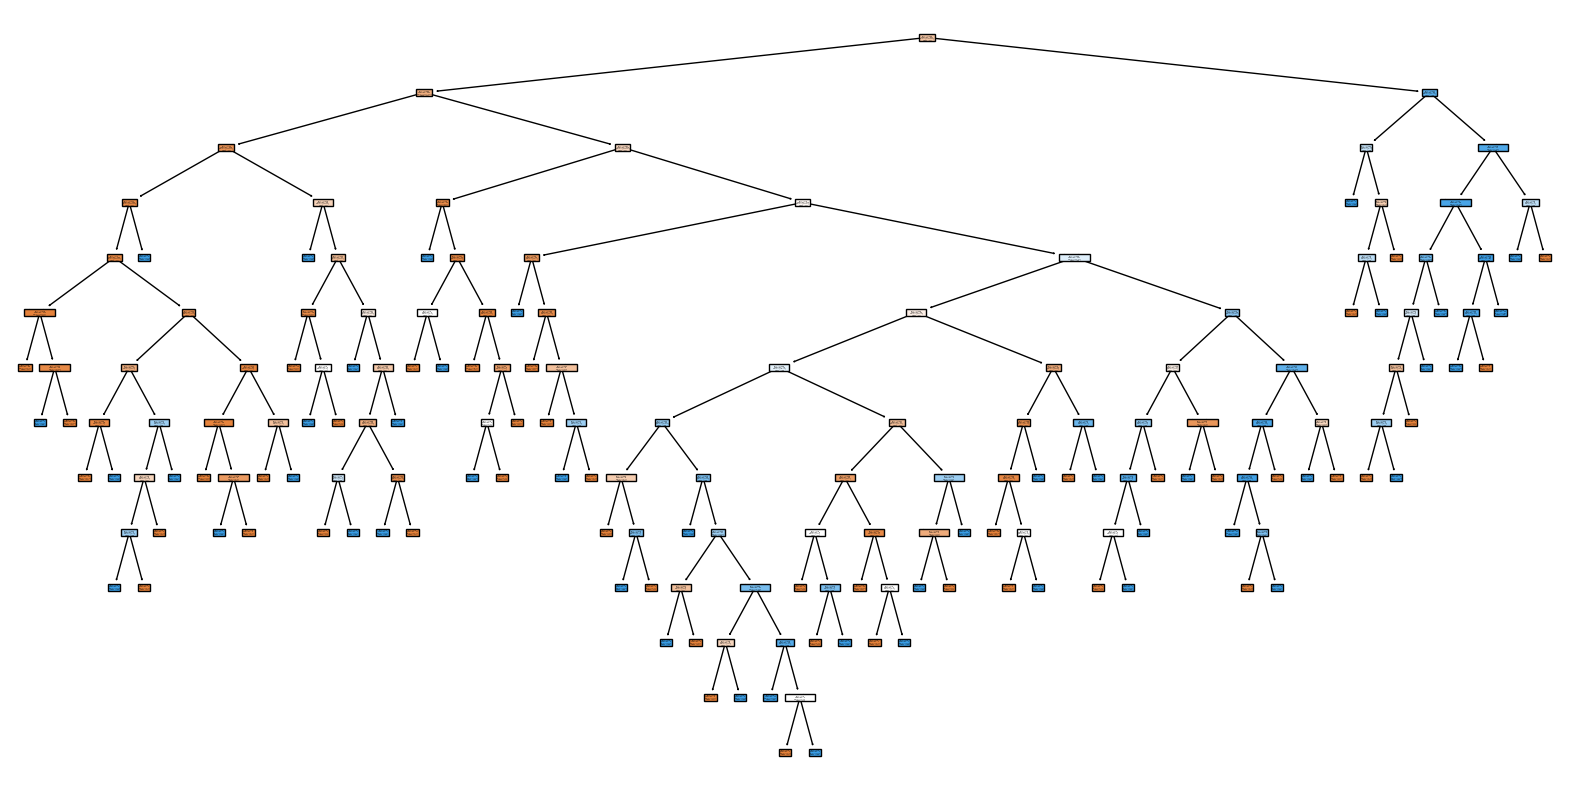

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Karar Ağacı'nın görselleştirilmesi
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=decision_tree.classes_)
plt.show()


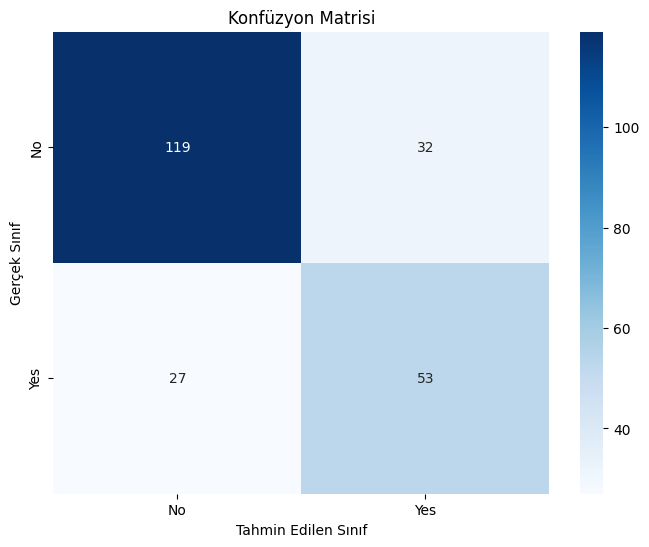

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Konfüzyon matrisini oluştur
conf_matrix = confusion_matrix(y_test, test_predictions)

# Konfüzyon matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Konfüzyon Matrisi')
plt.show()


In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Veri setini %70 eğitim ve %30 test olacak şekilde rastgele ayır
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Result']), data['Result'], test_size=0.3, random_state=42)

# Naive Bayes sınıflandırıcısını uygula
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Eğitim verisi üzerinde tahminler yap
train_predictions = naive_bayes.predict(X_train)

# Eğitim verisi için performans metriklerini hesapla
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, pos_label='No')
train_recall = recall_score(y_train, train_predictions, pos_label='No')
train_f1 = f1_score(y_train, train_predictions, pos_label='No')

# Sonuçları raporla
print("Eğitim Doğruluk:", train_accuracy)
print("Eğitim Hassasiyet:", train_precision)
print("Eğitim Duyarlılık (Özgüllük):", train_recall)
print("Eğitim F1 Skoru:", train_f1)

# Test verisi üzerinde tahminler yap
test_predictions = naive_bayes.predict(X_test)

# Test verisi için performans metriklerini hesapla
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, pos_label='No')
test_recall = recall_score(y_test, test_predictions, pos_label='No')
test_f1 = f1_score(y_test, test_predictions, pos_label='No')

# Sonuçları raporla
print("\nTest Performans Metrikleri:")
print("Test Doğruluk:", test_accuracy)
print("Test Hassasiyet:", test_precision)
print("Test Duyarlılık (Özgüllük):", test_recall)
print("Test F1 Skoru:", test_f1)


Eğitim Doğruluk: 0.7672253258845437
Eğitim Hassasiyet: 0.7947368421052632
Eğitim Duyarlılık (Özgüllük): 0.8653295128939829
Eğitim F1 Skoru: 0.8285322359396433

Test Performans Metrikleri:
Test Doğruluk: 0.7445887445887446
Test Hassasiyet: 0.815068493150685
Test Duyarlılık (Özgüllük): 0.7880794701986755
Test F1 Skoru: 0.8013468013468014


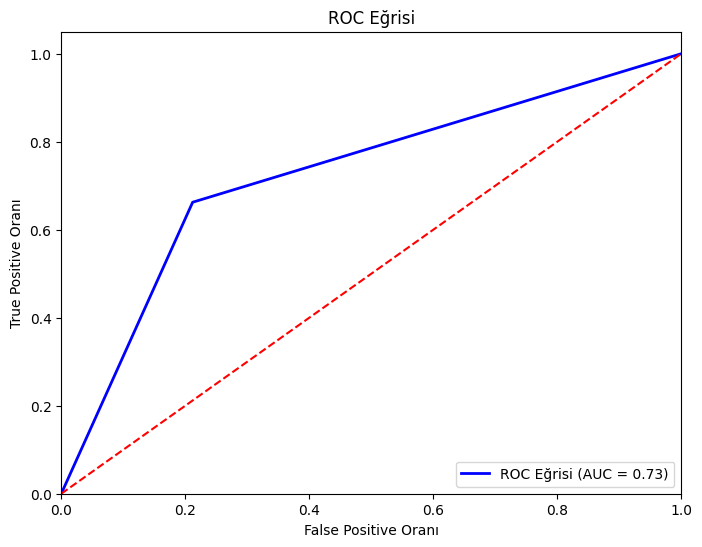

In [57]:
from sklearn.metrics import roc_curve, auc

# Karar ağacı modelinin tahminlerine göre ROC eğrisini oluştur
fpr, tpr, thresholds = roc_curve((y_test == 'Yes').astype(int), (test_predictions == 'Yes').astype(int))
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()
